In [3]:
## 1. Import library utama ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
## 2. Load data hasil preprocessing ===
train_path = "../data/processed/train_data.csv"
test_path = "../data/processed/test_data.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Pisahkan fitur dan target
X_train = train_df.drop('Selling_Price', axis=1)
y_train = train_df['Selling_Price']
X_test = test_df.drop('Selling_Price', axis=1)
y_test = test_df['Selling_Price']

print("✅ Data siap untuk training")
print("Fitur:", X_train.shape, "| Target:", y_train.shape)


✅ Data siap untuk training
Fitur: (239, 7) | Target: (239,)


In [5]:
## 3. Fungsi evaluasi model ===
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\n📈 Model: {name}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return {
        "Model": name,
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    }

In [6]:
## 4. Latih beberapa model dasar ===
results = []

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "CatBoost": CatBoostRegressor(
        iterations=500, depth=6, learning_rate=0.1,
        loss_function='RMSE', verbose=False, random_state=42
    )
}

for name, model in models.items():
    result = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results.append(result)


📈 Model: Linear Regression
R² Score: 0.7411
MAE: 1.5411
RMSE: 2.5832

📈 Model: Ridge Regression
R² Score: 0.7445
MAE: 1.5333
RMSE: 2.5663

📈 Model: Lasso Regression
R² Score: 0.7423
MAE: 1.5379
RMSE: 2.5771

📈 Model: Random Forest
R² Score: 0.5347
MAE: 1.4619
RMSE: 3.4629

📈 Model: CatBoost
R² Score: 0.8420
MAE: 0.9148
RMSE: 2.0182


In [7]:
## 5. Bandingkan hasil model ===
results_df = pd.DataFrame(results)
print("\n📊 Ringkasan hasil:")
print(results_df.sort_values(by="R2", ascending=False))


📊 Ringkasan hasil:
               Model        R2       MAE      RMSE
4           CatBoost  0.841960  0.914775  2.018218
1   Ridge Regression  0.744478  1.533350  2.566250
2   Lasso Regression  0.742319  1.537883  2.577070
0  Linear Regression  0.741083  1.541072  2.583242
3      Random Forest  0.534728  1.461861  3.462886


C:\Users\Mugis\AppData\Local\Temp\ipykernel_2636\221417096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2", y="Model", data=results_df.sort_values(by="R2", ascending=False), palette="viridis")


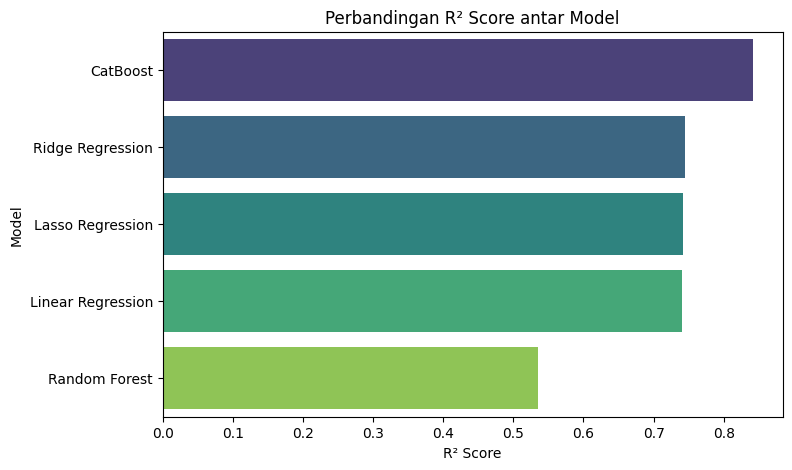

In [8]:
## 6. Visualisasi performa model ===
plt.figure(figsize=(8, 5))
sns.barplot(x="R2", y="Model", data=results_df.sort_values(by="R2", ascending=False), palette="viridis")
plt.title("Perbandingan R² Score antar Model")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.show()

In [9]:
## 7. Simpan model terbaik ===
best_model_name = results_df.sort_values(by="R2", ascending=False).iloc[0]["Model"]
print(f"\n🏆 Model terbaik: {best_model_name}")


🏆 Model terbaik: CatBoost


In [ ]:
## Misalnya model terbaik CatBoost → simpan modelnya
#best_model = models[best_model_name]
#best_model.fit(X_train, y_train)
#import joblib
#joblib.dump(best_model, f"../models/{best_model_name.replace(' ', '_').lower()}_model.pkl")

#print("💾 Model disimpan di folder models/")